In [2]:


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Setting up some parameters for the workbook

plt.style.use('classic')
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
#from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, fbeta_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE, ADASYN

In [5]:
df=pd.read_csv("insurance.csv")

In [6]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,NO,87200,17440,8720,61040,2006,N
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,NO,108480,18080,18080,72320,2015,N
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,NO,2,3,YES,67500,7500,7500,52500,1996,N
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,NO,0,1,YES,46980,5220,5220,36540,1998,N


In [7]:
# Checking the features and no. of records in the dataset.

print("The number of records are : ", df.shape[0])
print("The number of features are : ", df.shape[1])
print("The list of features is : ", df.columns)
df.head()

The number of records are :  1000
The number of features are :  35
The list of features is :  Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported'],
      dtype='object')


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,2009,N


In [8]:
missing_stats = []

for col in df.columns:
    missing_stats.append((col, df[col].nunique(), df[col].isnull().sum() / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0], df[col].dtype))
    
stats_df = pd.DataFrame(missing_stats, columns=['feature', 'unique_values', 'percent_missing', 'percent_biggest_cat', 'type'])
stats_df

,feature,unique_values,percent_missing,percent_biggest_cat,type
0,months_as_customer,391,0.0,0.008,int64
1,age,46,0.0,0.049,int64
2,policy_bind_date,951,0.0,0.003,object
3,policy_state,3,0.0,0.352,object
4,policy_csl,3,0.0,0.351,object
5,policy_deductable,3,0.0,0.351,int64
6,policy_annual_premium,991,0.0,0.002,float64
7,umbrella_limit,11,0.0,0.798,int64
8,insured_zip,995,0.0,0.002,int64
9,insured_sex,2,0.0,0.537,object


In [9]:
df["collision_type"].value_counts()
# Checking feature "collision_type"

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [10]:
df["property_damage"].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [11]:
# Checking feature "collision_type"

df["police_report_available"].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [12]:
df["collision_type"] = np.where(df["collision_type"] == "?", "Undocumented", df["collision_type"])
df["property_damage"] = np.where(df["property_damage"] == "?", "Undocumented", df["property_damage"])
df["police_report_available"] = np.where(df["police_report_available"] == "?", "Undocumented", df["police_report_available"])

Text(0.5, 0, ' ')

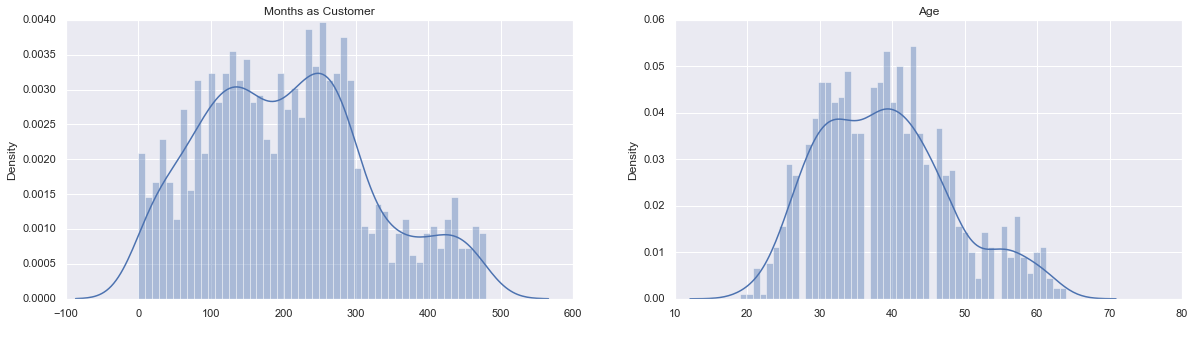

In [13]:
# Checking feature "months_as_customer" and "age"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig, (ax1, ax2) = plot_objects

sns.distplot(df["months_as_customer"], bins=50 , ax=ax1)
ax1.set_title("Months as Customer")
ax1.set_xlabel(" ")

sns.distplot(df["age"], bins=50 , ax=ax2)
ax2.set_title("Age")
ax2.set_xlabel(" ")

In [14]:
df[["months_as_customer", "age"]].describe()

,months_as_customer,age
count,1000.000000,1000.000000
mean,203.954000,38.948000
std,115.113174,9.140287
min,0.000000,19.000000
25%,115.750000,32.000000
50%,199.500000,38.000000
75%,276.250000,44.000000
max,479.000000,64.000000


In [15]:
df["policy_bind_date"].nunique()

951

In [16]:
# "policy_bind_date" is a datetime feature and we can extract the year from it.

df["policy_bind_date"] = pd.to_datetime(df["policy_bind_date"])
df["policy_bind_year"] = df["policy_bind_date"].dt.year

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

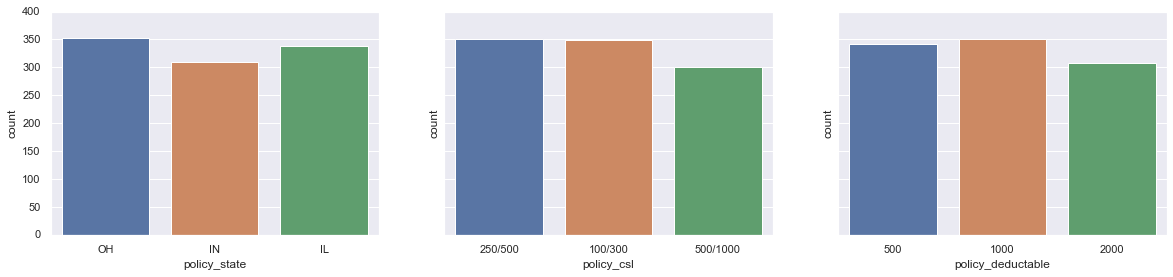

In [17]:
# Plotting the countplot for the few categorical features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)

sns.countplot("policy_state", data=df, ax=axes[0])
sns.countplot("policy_csl", data=df, ax=axes[1])
sns.countplot("policy_deductable", data=df, ax=axes[2])

The basic statistics for the feature is :
 count    1000.000000
mean     1256.406150
std       244.167395
min       433.330000
25%      1089.607500
50%      1257.200000
75%      1415.695000
max      2047.590000
Name: policy_annual_premium, dtype: float64
The number of unique values in the feature is : 991


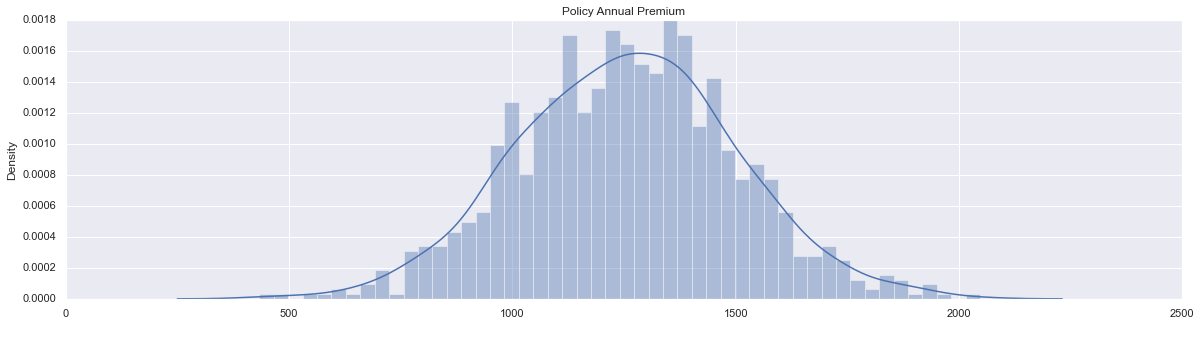

In [18]:
# Checking feature "policy_annual_premium"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["policy_annual_premium"], bins=50 , ax=ax1)
ax1.set_title("Policy Annual Premium")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["policy_annual_premium"].describe())
print("The number of unique values in the feature is :", df["policy_annual_premium"].nunique())

The basic statistics for the feature is :
 count    1.000000e+03
mean     1.101000e+06
std      2.297407e+06
min     -1.000000e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64
The number of unique values in the feature is : 11


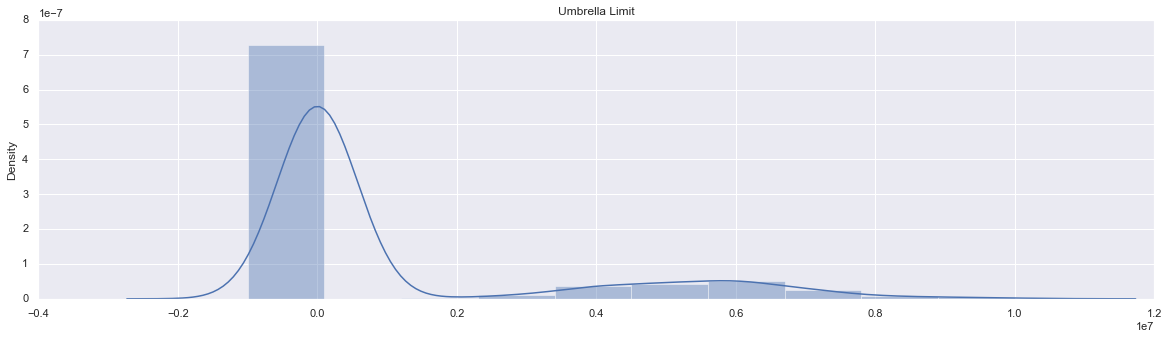

In [19]:
# Checking feature "umbrella_limit"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["umbrella_limit"], bins=10 , ax=ax1)
ax1.set_title("Umbrella Limit")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["umbrella_limit"].describe())
print("The number of unique values in the feature is :", df["umbrella_limit"].nunique())

In [20]:
df["umbrella_limit"] = np.abs(df["umbrella_limit"]) 

The basic statistics for the feature is :
 count    1.000000e+03
mean     1.103000e+06
std      2.296446e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64
The number of unique values in the feature is : 11


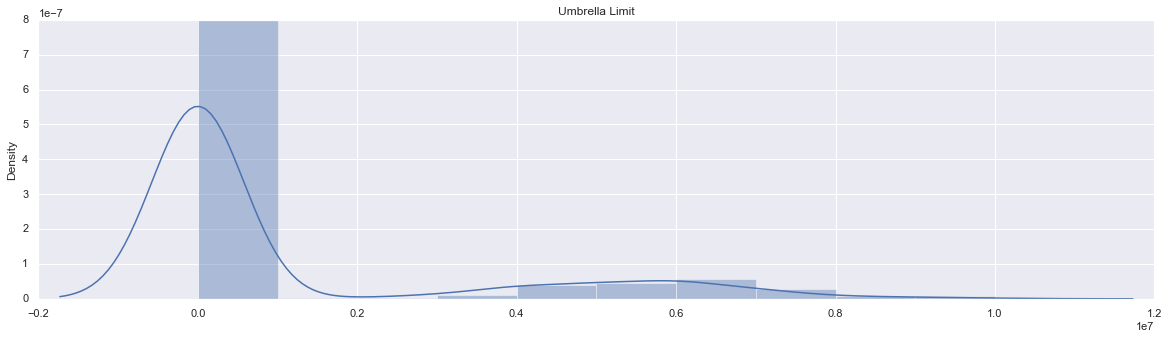

In [21]:
# rechecking feature "umbrella_limit"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["umbrella_limit"], bins=10 , ax=ax1)
ax1.set_title("Umbrella Limit")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["umbrella_limit"].describe())
print("The number of unique values in the feature is :", df["umbrella_limit"].nunique())

The basic statistics for the feature is :
 count      1000.000000
mean     501214.488000
std       71701.610941
min      430104.000000
25%      448404.500000
50%      466445.500000
75%      603251.000000
max      620962.000000
Name: insured_zip, dtype: float64
The number of unique values in the feature is : 995


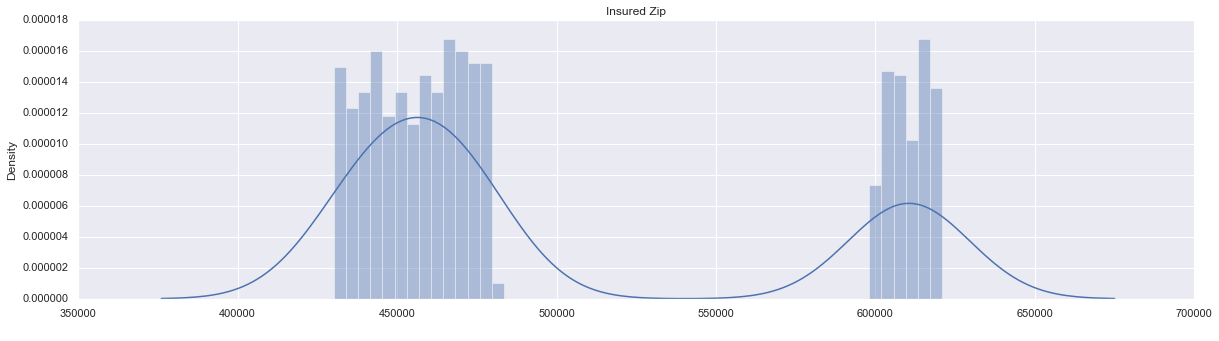

In [22]:
# Checking feature "insured_zip"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["insured_zip"], bins=50 , ax=ax1)
ax1.set_title("Insured Zip")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["insured_zip"].describe())
print("The number of unique values in the feature is :", df["insured_zip"].nunique())

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

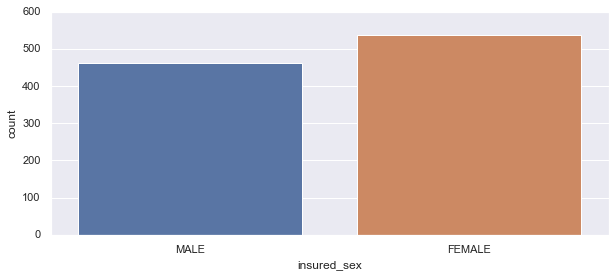

In [23]:
# Plotting the countplot for "insured_sex" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(10, 4), sharey=True)
sns.countplot("insured_sex", data=df, ax=axes)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

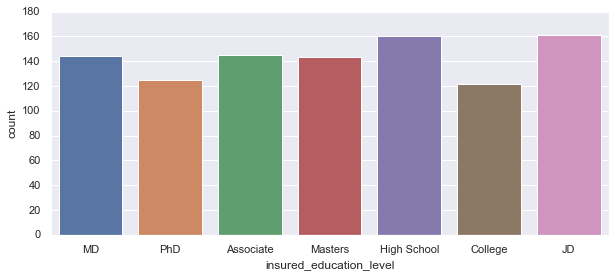

In [24]:
# Plotting the countplot for the "insured_education_level" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(10, 4), sharey=True)
sns.countplot("insured_education_level", data=df, ax=axes)

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

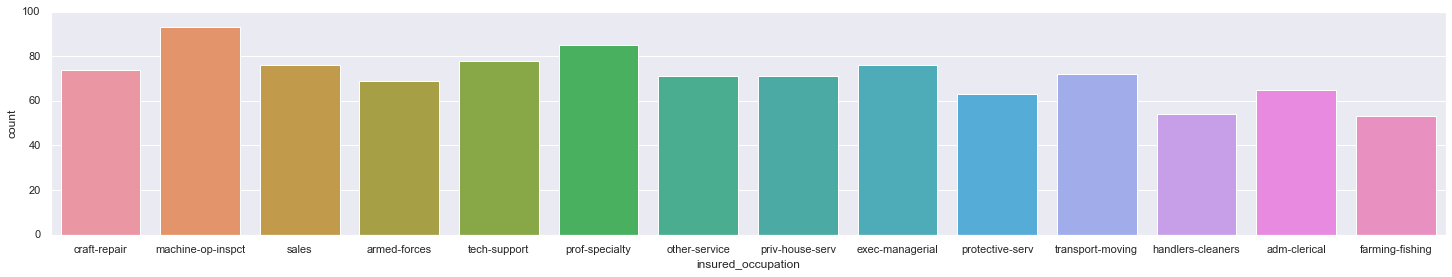

In [25]:
# Plotting the countplot for the "insured_occupation" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("insured_occupation", data=df, ax=axes)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

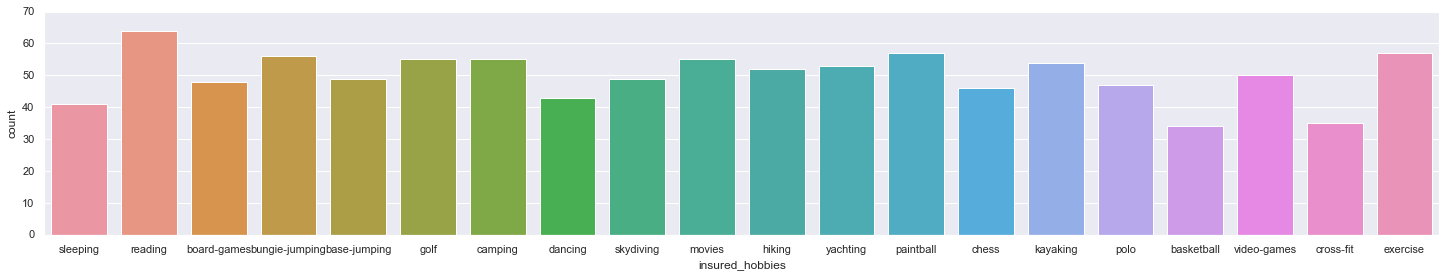

In [26]:
# Plotting the countplot for the "insured_hobbies" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("insured_hobbies", data=df, ax=axes)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

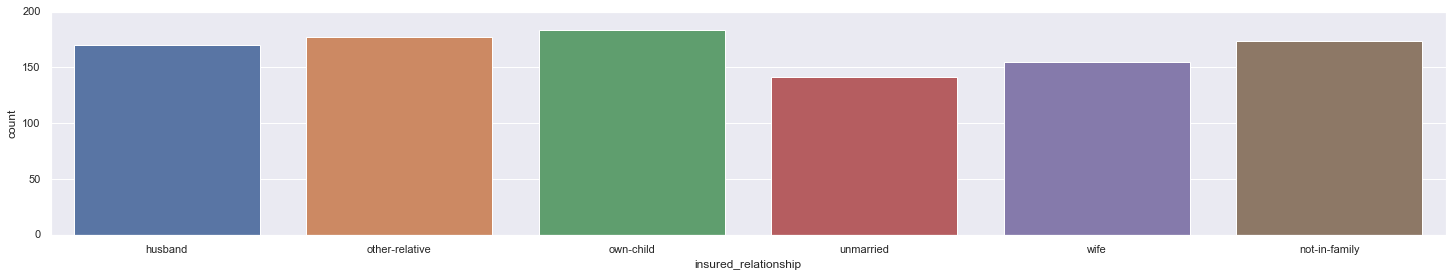

In [27]:
# Plotting the countplot for the "insured_relationship" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("insured_relationship", data=df, ax=axes)

The basic statistics for the feature is :
 count      1000.000000
mean      25126.100000
std       27872.187708
min           0.000000
25%           0.000000
50%           0.000000
75%       51025.000000
max      100500.000000
Name: capital-gains, dtype: float64
The number of unique values in the feature is : 338


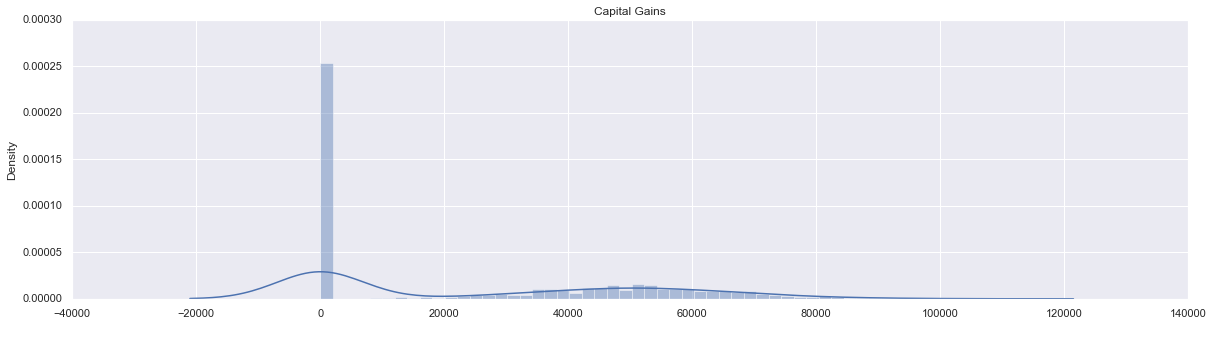

In [28]:
# Checking feature "capital-gains"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["capital-gains"], bins=50 , ax=ax1)
ax1.set_title("Capital Gains")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["capital-gains"].describe())
print("The number of unique values in the feature is :", df["capital-gains"].nunique())

The basic statistics for the feature is :
 count      1000.000000
mean     -26793.700000
std       28104.096686
min     -111100.000000
25%      -51500.000000
50%      -23250.000000
75%           0.000000
max           0.000000
Name: capital-loss, dtype: float64
The number of unique values in the feature is : 354


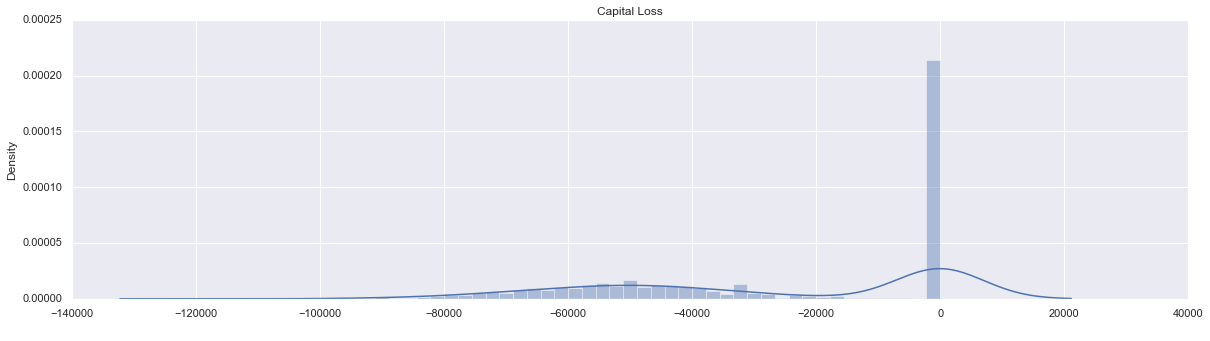

In [29]:
# Checking feature "capital-loss"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["capital-loss"], bins=50 , ax=ax1)
ax1.set_title("Capital Loss")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["capital-loss"].describe())
print("The number of unique values in the feature is :", df["capital-loss"].nunique())

In [30]:
# Extracting the month from "incident_date", given all the data is from 2015 we may not extract year
df["incident_date"] = pd.to_datetime(df["incident_date"])
df['incident_month'] = df['incident_date'].dt.month

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

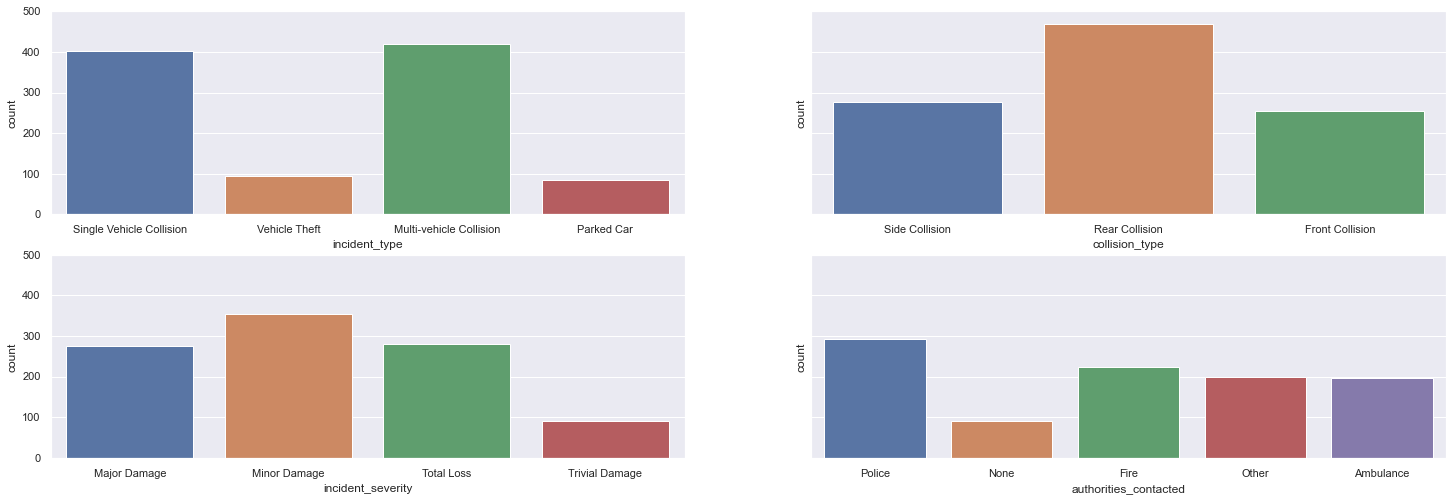

In [31]:
# Plotting the countplot for the "incident_type" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(25, 8), sharey=True)
sns.countplot("incident_type", data=df, ax=axes[0,0])
sns.countplot("collision_type", data=df, ax=axes[0,1])
sns.countplot("incident_severity", data=df, ax=axes[1,0])
sns.countplot("authorities_contacted", data=df, ax=axes[1,1])

<AxesSubplot:xlabel='incident_city', ylabel='count'>

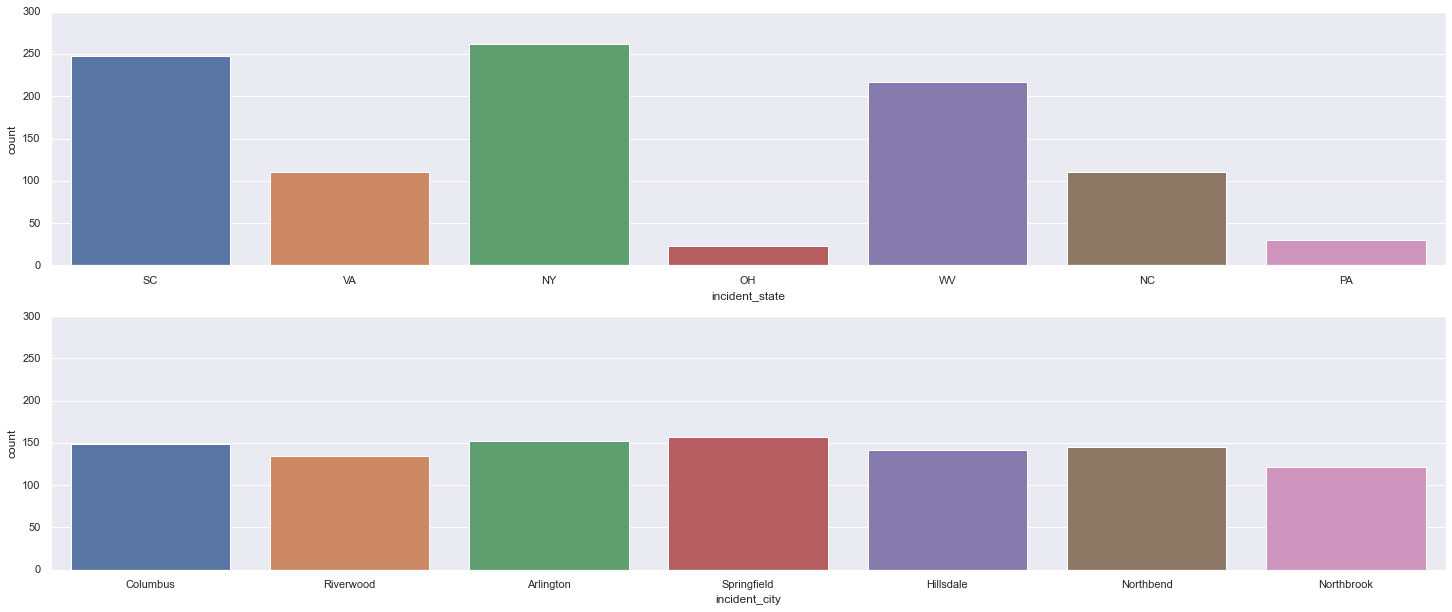

In [32]:
# Plotting the countplot for the "incident_type" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 10), sharey=True)
sns.countplot("incident_state", data=df, ax=axes[0])
sns.countplot("incident_city", data=df, ax=axes[1])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

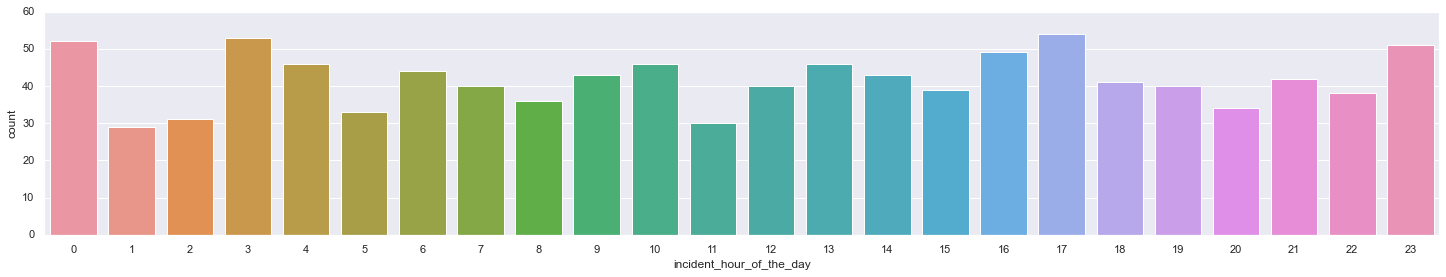

In [33]:
# Plotting the countplot for the "incident_type" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("incident_hour_of_the_day", data=df, ax=axes)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

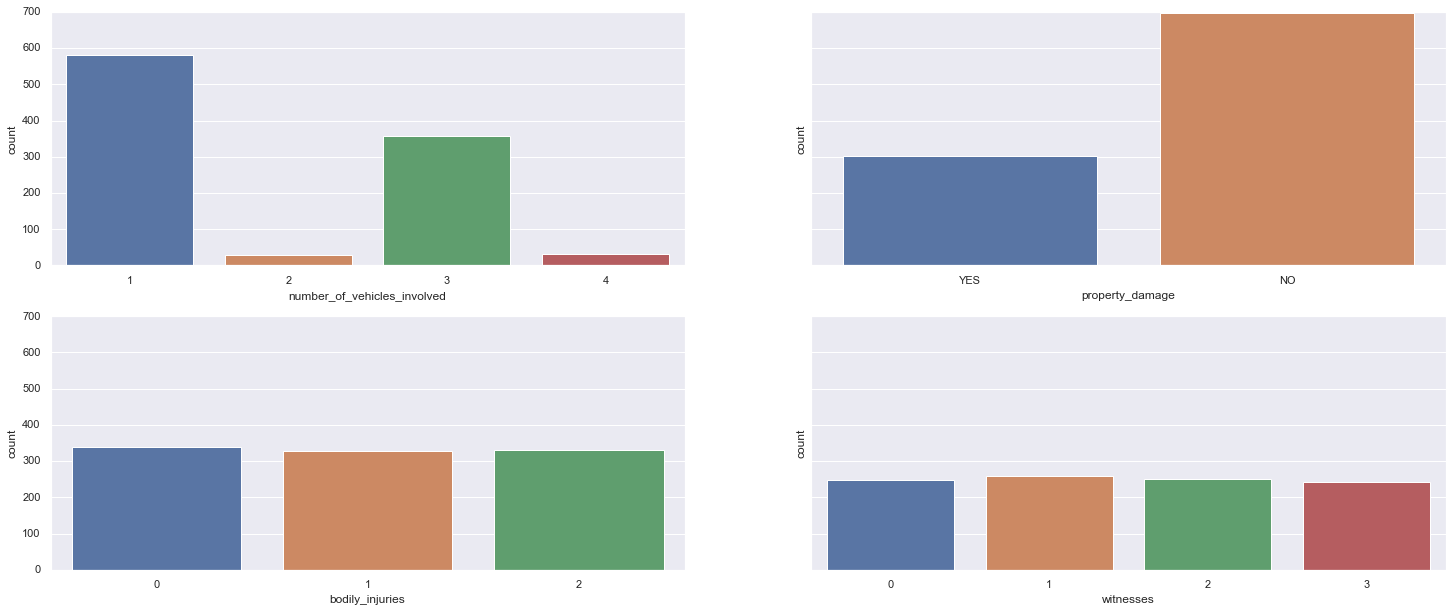

In [34]:
# Plotting the countplot for few categorical features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(25, 10), sharey=True)
sns.countplot("number_of_vehicles_involved", data=df, ax=axes[0,0])
sns.countplot("property_damage", data=df, ax=axes[0,1])
sns.countplot("bodily_injuries", data=df, ax=axes[1,0])
sns.countplot("witnesses", data=df, ax=axes[1,1])

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

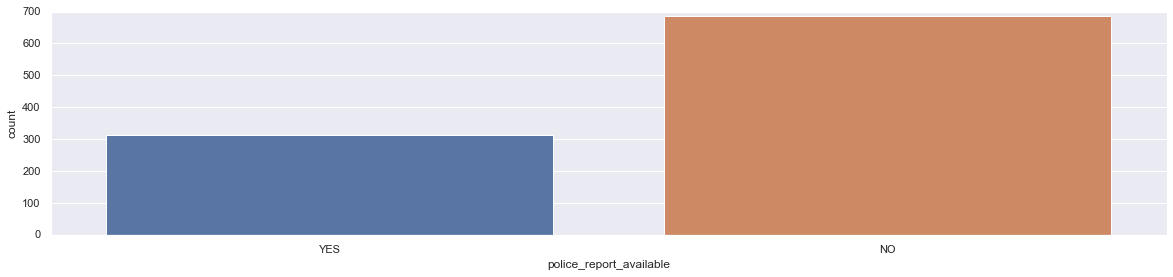

In [35]:
# Plotting the countplot for the "police_report_available" feature

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(20, 4), sharey=True)
sns.countplot("police_report_available", data=df, ax=axes)

The basic statistics for the feature is :
 count      1000.00000
mean      52761.94000
std       26401.53319
min         100.00000
25%       41812.50000
50%       58055.00000
75%       70592.50000
max      114920.00000
Name: total_claim_amount, dtype: float64
The number of unique values in the feature is : 763


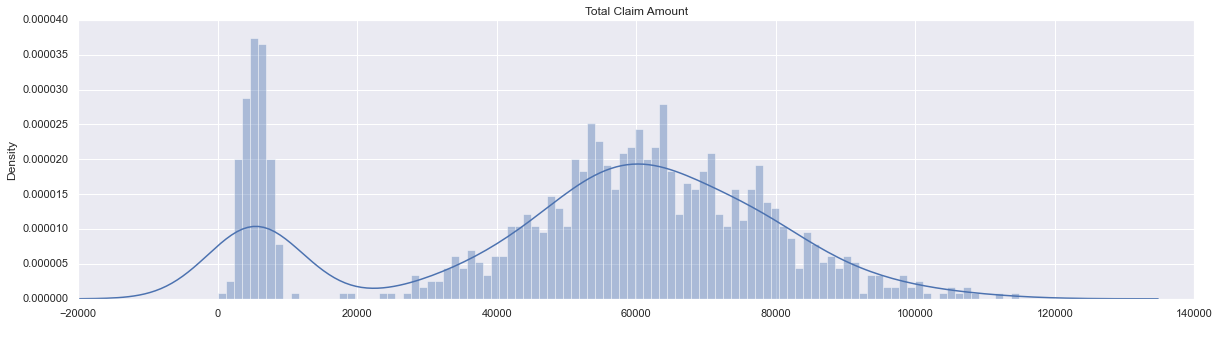

In [36]:
# Checking feature "total_claim_amount"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["total_claim_amount"], bins=100 , ax=ax1)
ax1.set_title("Total Claim Amount")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["total_claim_amount"].describe())
print("The number of unique values in the feature is :", df["total_claim_amount"].nunique())

The basic statistics for the feature is :
 count     1000.000000
mean      7433.420000
std       4880.951853
min          0.000000
25%       4295.000000
50%       6775.000000
75%      11305.000000
max      21450.000000
Name: injury_claim, dtype: float64
The number of unique values in the feature is : 638


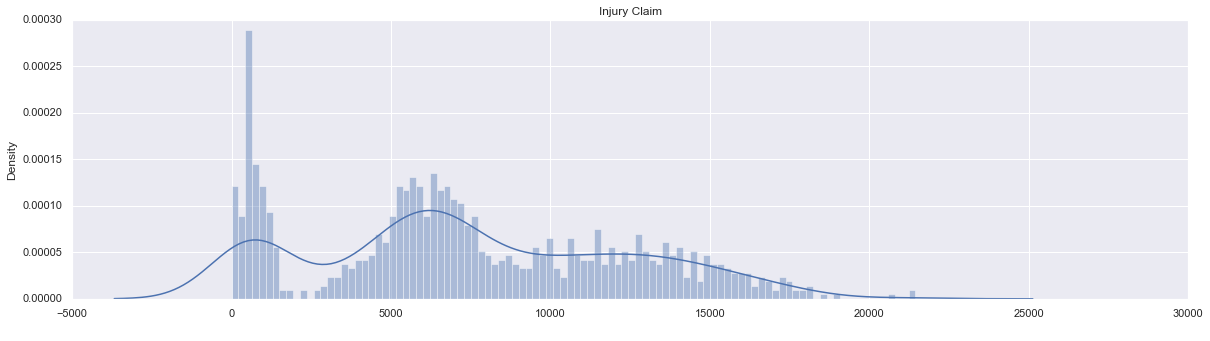

In [37]:
# Checking feature "injury_claim"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["injury_claim"], bins=100 , ax=ax1)
ax1.set_title("Injury Claim")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["injury_claim"].describe())
print("The number of unique values in the feature is :", df["injury_claim"].nunique())

The basic statistics for the feature is :
 count     1000.000000
mean      7399.570000
std       4824.726179
min          0.000000
25%       4445.000000
50%       6750.000000
75%      10885.000000
max      23670.000000
Name: property_claim, dtype: float64
The number of unique values in the feature is : 626


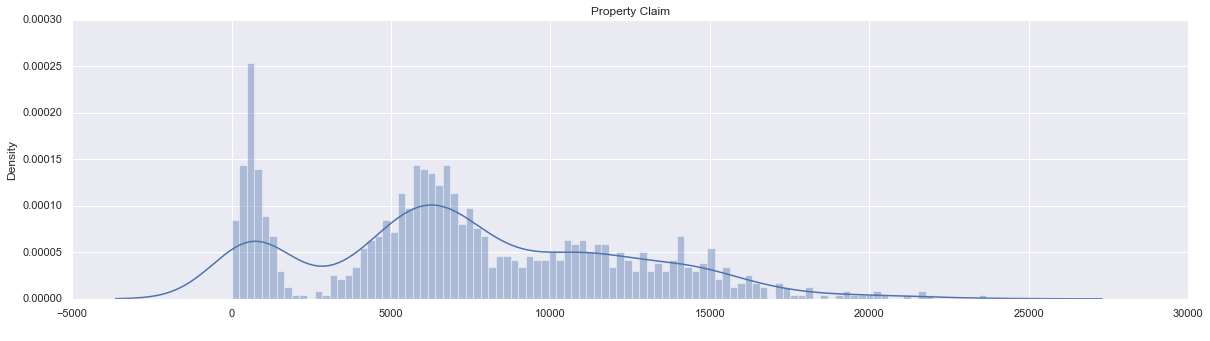

In [38]:
# Checking feature "property_claim"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["property_claim"], bins=100 , ax=ax1)
ax1.set_title("Property Claim")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["property_claim"].describe())
print("The number of unique values in the feature is :", df["property_claim"].nunique())

The basic statistics for the feature is :
 count     1000.000000
mean     37928.950000
std      18886.252893
min         70.000000
25%      30292.500000
50%      42100.000000
75%      50822.500000
max      79560.000000
Name: vehicle_claim, dtype: float64
The number of unique values in the feature is : 726


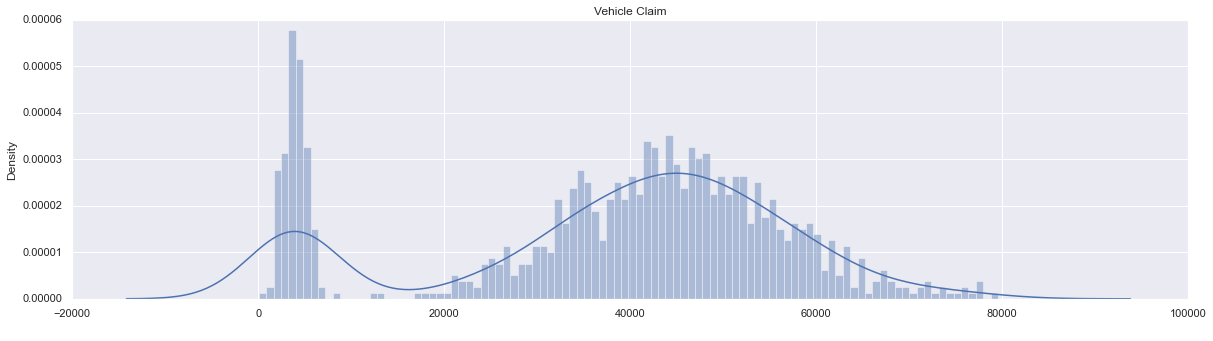

In [39]:
# Checking feature "vehicle_claim"

sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
fig, ax1 = plot_objects

sns.distplot(df["vehicle_claim"], bins=100 , ax=ax1)
ax1.set_title("Vehicle Claim")
ax1.set_xlabel(" ")

print("The basic statistics for the feature is :\n", df["vehicle_claim"].describe())
print("The number of unique values in the feature is :", df["vehicle_claim"].nunique())

<AxesSubplot:xlabel='auto_year', ylabel='count'>

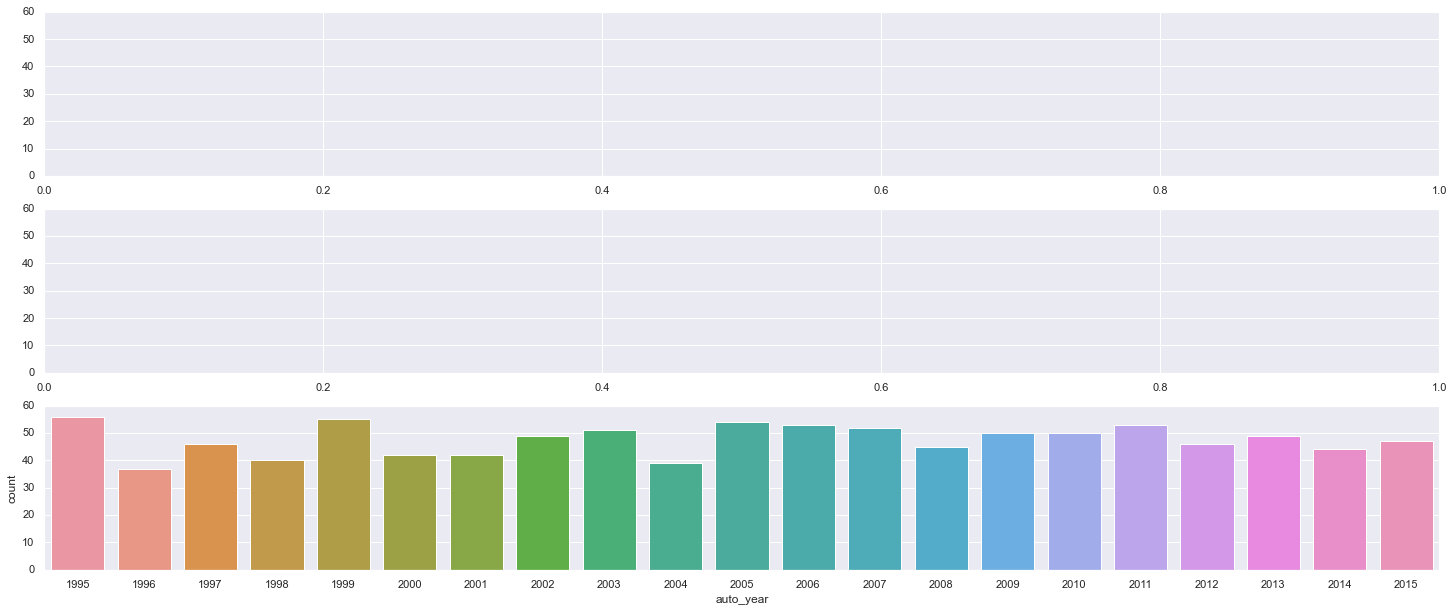

In [40]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 1, figsize=(25, 10), sharey=True)

sns.countplot("auto_year", data=df, ax=axes[2])

<AxesSubplot:xlabel='policy_bind_year', ylabel='count'>

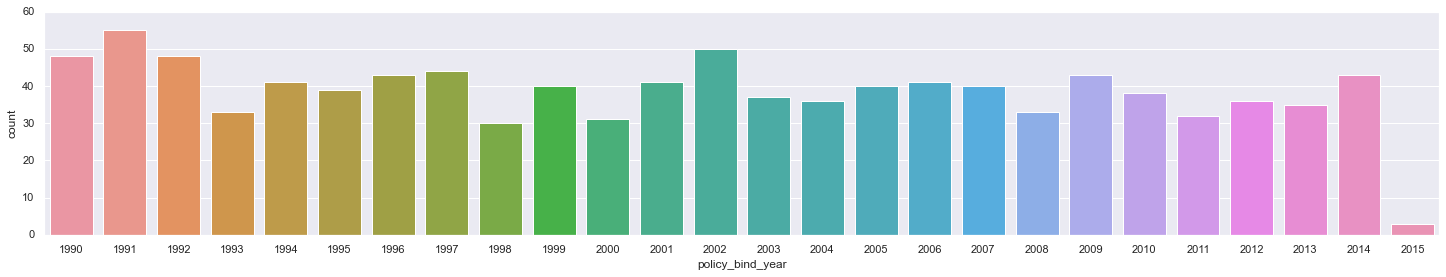

In [41]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("policy_bind_year", data=df, ax=axes)

<AxesSubplot:xlabel='incident_month', ylabel='count'>

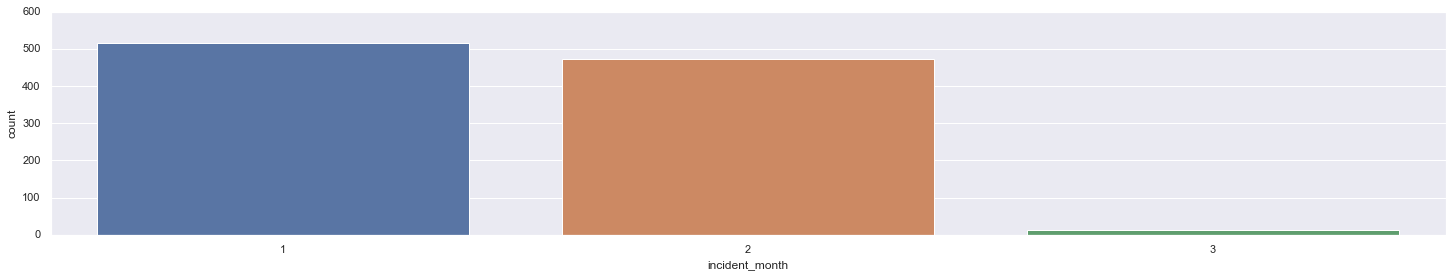

In [42]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot("incident_month", data=df, ax=axes)

The unique values are : 
 N    753
Y    247
Name: fraud_reported, dtype: int64


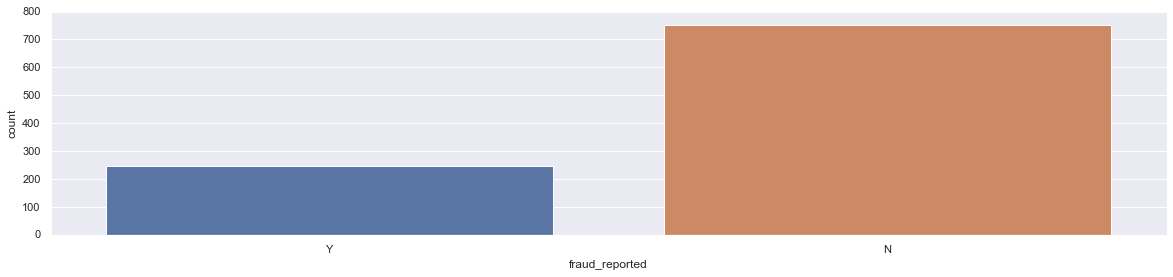

In [43]:
# Plotting the countplot for features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(20, 4), sharey=True)
sns.countplot("fraud_reported", data=df, ax=axes)

print("The unique values are : \n", df["fraud_reported"].value_counts())

In [44]:
dict_boolean = {"Y":1, "N":0}

In [45]:
# Replacing the labels with integers
df["fraud_reported"] = df["fraud_reported"].map(dict_boolean) 

In [46]:
# Checking the relation of "auto_model" and "incident_date" which are high cardinal values with the dependent feature "fraud_reported"

large_dummy = pd.get_dummies(df[['incident_date']], drop_first=True)
large_dummy['fraud_reported'] = df['fraud_reported']
large_dummy.head(10)

,incident_date,fraud_reported
0,2015-01-25,1
1,2015-01-21,1
2,2015-02-22,0
3,2015-01-10,1
4,2015-02-17,0
5,2015-01-02,1
6,2015-01-13,0
7,2015-02-27,0
8,2015-01-30,0
9,2015-01-05,0


In [47]:
#Color negative numbers red, positive blue
def color(val):
    color = 'green' if val ==1 else 'red' if val < -0.3 else 'blue' if val > 0.3 else 'black'   
    return 'color: %s' % color

corr = large_dummy.corr()
corr.style.applymap(color)

,fraud_reported
fraud_reported,1.000000


In [48]:
corr = df.corr()
corr.style.applymap(color)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,incident_month
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.016111,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544,-0.048276,-0.042826
age,0.922098,1.000000,0.029188,0.014404,0.018425,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143,-0.037444,-0.037058
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.009968,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817,-0.049598,-0.026416
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.005956,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,0.001249,-0.046097
umbrella_limit,0.016111,0.018425,0.009968,-0.005956,1.000000,0.018913,-0.048074,-0.023235,-0.023097,-0.021997,0.021698,-0.007123,-0.038994,-0.045229,-0.022044,-0.037190,0.008578,0.058147,0.047246,-0.003403
insured_zip,0.017895,0.025604,0.004545,0.032354,0.018913,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368,-0.001100,-0.032630
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.048074,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173,0.041249,-0.037097
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.023235,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863,-0.026420,0.005949
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023097,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316,0.035412,-0.003416
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021997,0.027448,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554,0.051839,0.026595,0.052258


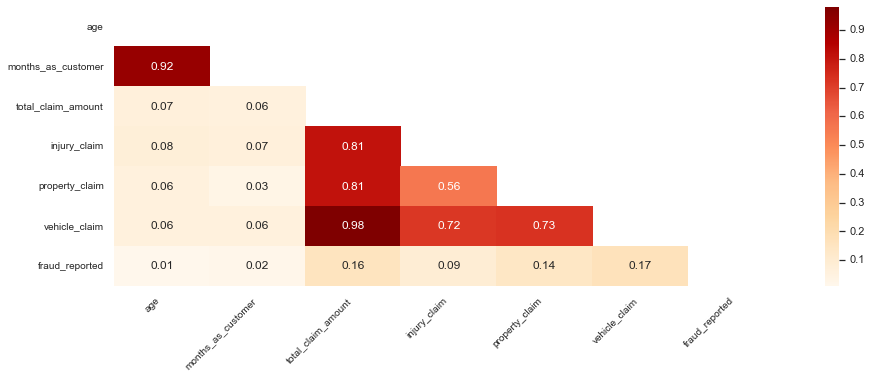

In [49]:
sns.set_style('white')

# heatmap from those with at least 0.3 magnitude in corr, includeing the DV
corr_list=['age','months_as_customer','total_claim_amount', \
           'injury_claim', 'property_claim','vehicle_claim', \
           'incident_severity','fraud_reported']

corr_df = df[corr_list]
corr=round(corr_df.corr(),2)

fix, ax = plt.subplots(figsize=(15,5))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #triu triangle upper
ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap='OrRd')

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, ha= 'right', rotation=45 )
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, va="center", rotation=0)

plt.show()

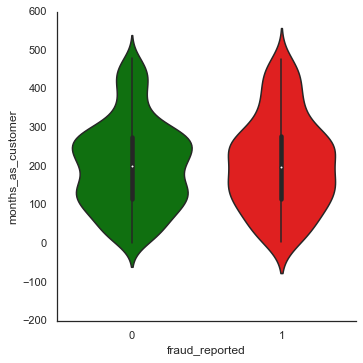

In [50]:
sns.catplot(data=df, x="fraud_reported", y="months_as_customer", kind='violin', palette=['green','red'])

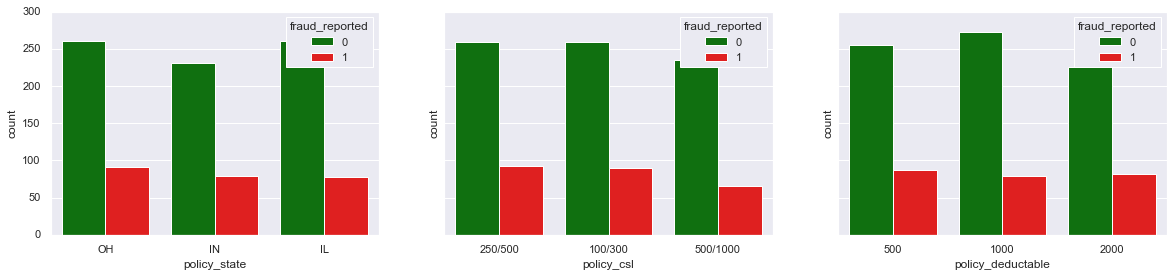

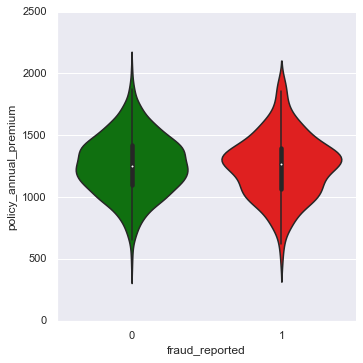

In [51]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=True)
sns.countplot(x="policy_state", data=df, hue="fraud_reported", ax=axes[0], palette=['green','red'])
sns.countplot(x="policy_csl", data=df, hue="fraud_reported", ax=axes[1], palette=['green','red'])
sns.countplot(x="policy_deductable", data=df, hue="fraud_reported", ax=axes[2], palette=['green','red'])
sns.catplot(data=df, x="fraud_reported", y="policy_annual_premium", kind='violin', palette=['green','red'])

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

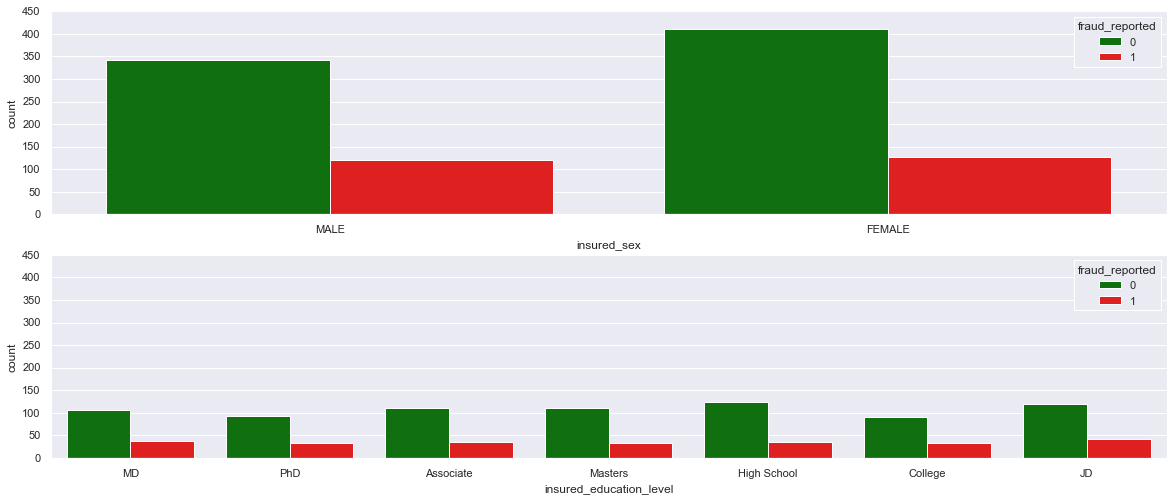

In [52]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(20, 8), sharey=True)
sns.countplot(x="insured_sex", data=df, hue="fraud_reported", ax=axes[0], palette=['green','red'])
sns.countplot(x="insured_education_level", data=df, hue="fraud_reported", ax=axes[1], palette=['green','red'])

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

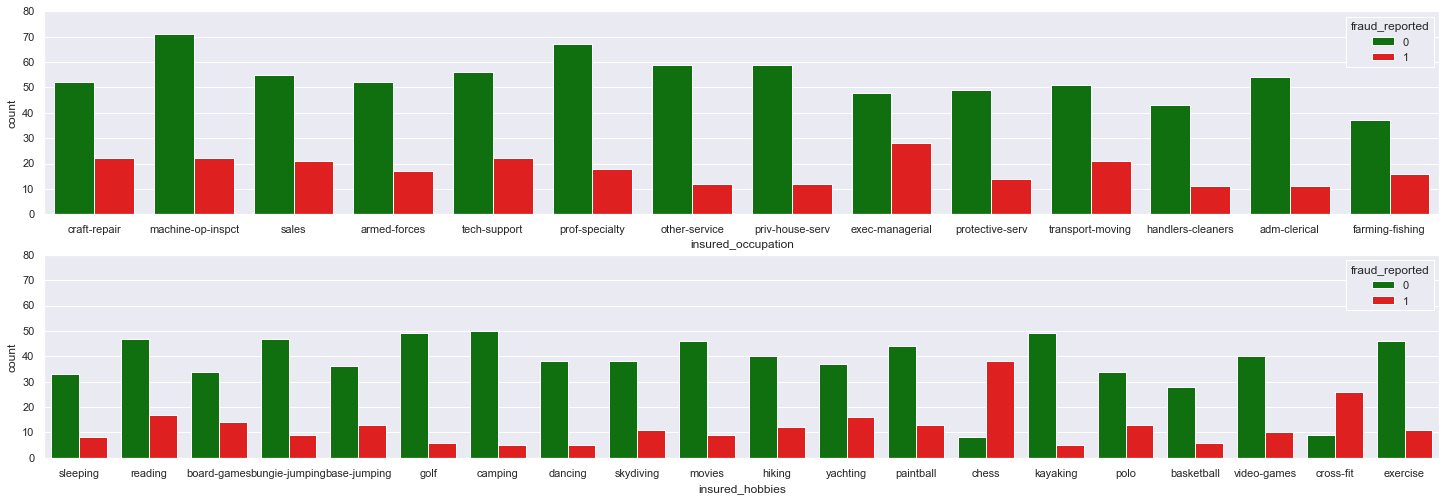

In [53]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="insured_occupation", data=df, hue="fraud_reported", ax=axes[0], palette=['green','red'])
sns.countplot(x="insured_hobbies", data=df, hue="fraud_reported", ax=axes[1], palette=['green','red'])

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

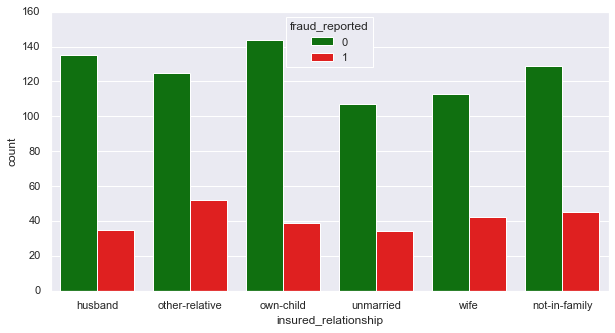

In [54]:
sns.countplot(x="insured_relationship", data=df, hue="fraud_reported", palette=['green','red'])

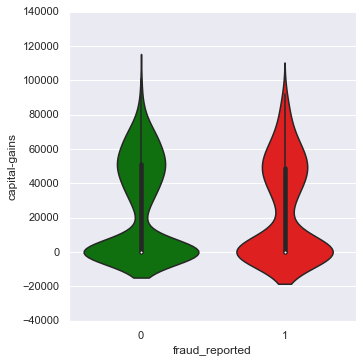

In [55]:
sns.catplot(data=df, x="fraud_reported", y="capital-gains", kind='violin', palette=['green','red'])

<AxesSubplot:xlabel='incident_city', ylabel='count'>

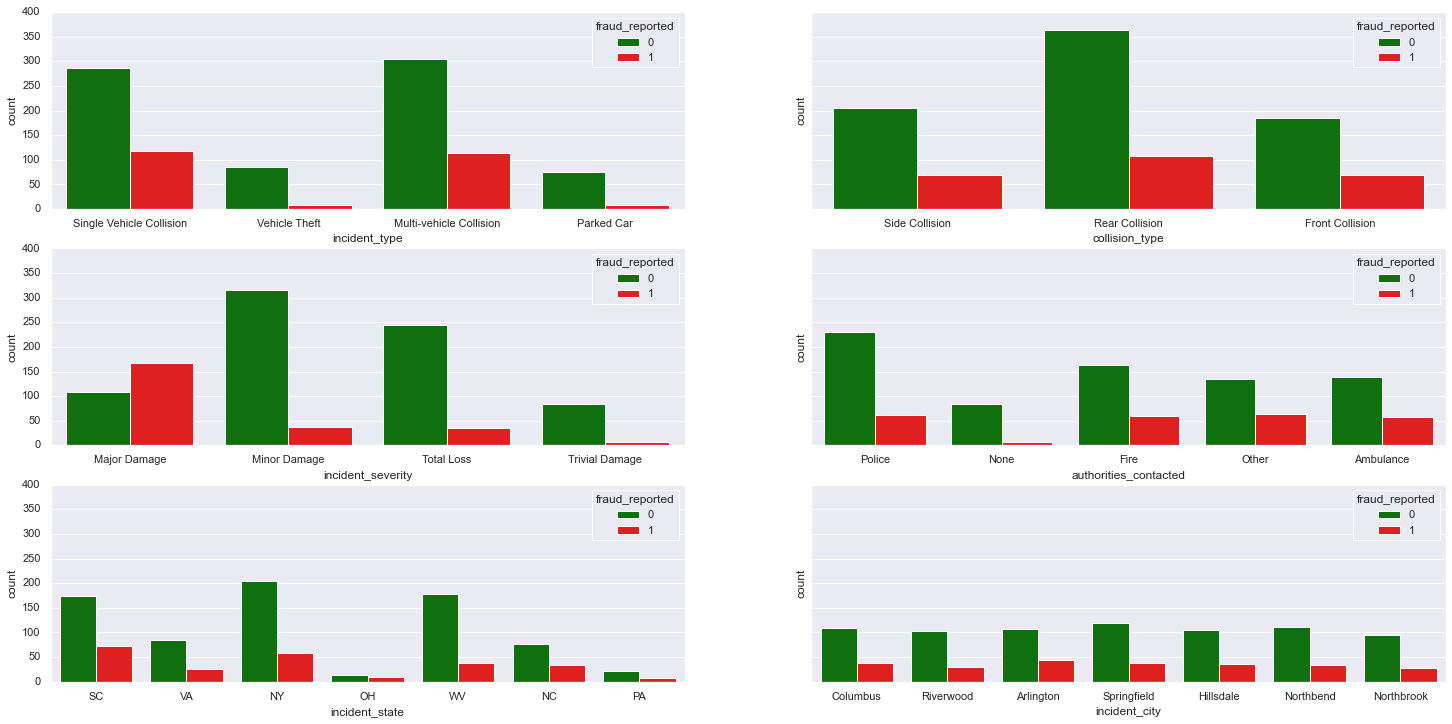

In [56]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(25, 12), sharey=True)
sns.countplot(x="incident_type", data=df, hue="fraud_reported", ax=axes[0,0], palette=['green','red'])
sns.countplot(x="collision_type", data=df, hue="fraud_reported", ax=axes[0,1], palette=['green','red'])
sns.countplot(x="incident_severity", data=df, hue="fraud_reported", ax=axes[1,0], palette=['green','red'])
sns.countplot(x="authorities_contacted", data=df, hue="fraud_reported", ax=axes[1,1], palette=['green','red'])
sns.countplot(x="incident_state", data=df, hue="fraud_reported", ax=axes[2,0], palette=['green','red'])
sns.countplot(x="incident_city", data=df, hue="fraud_reported", ax=axes[2,1], palette=['green','red'])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

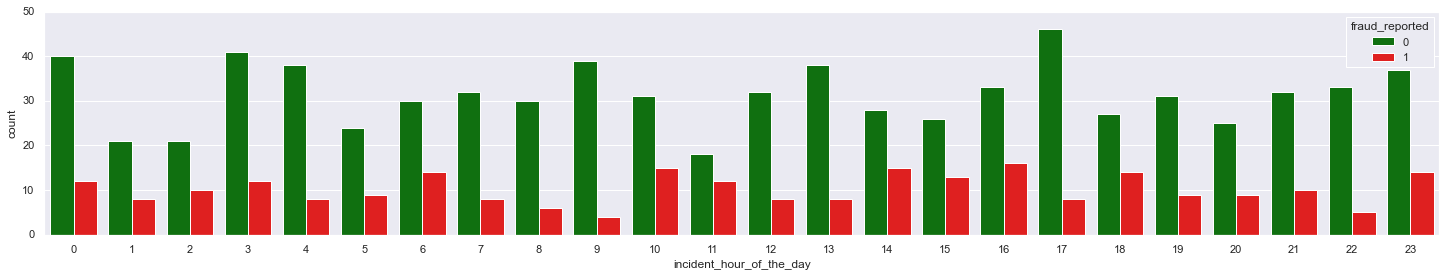

In [57]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 4), sharey=True)
sns.countplot(x="incident_hour_of_the_day", data=df, hue="fraud_reported", ax=axes, palette=['green','red'])

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

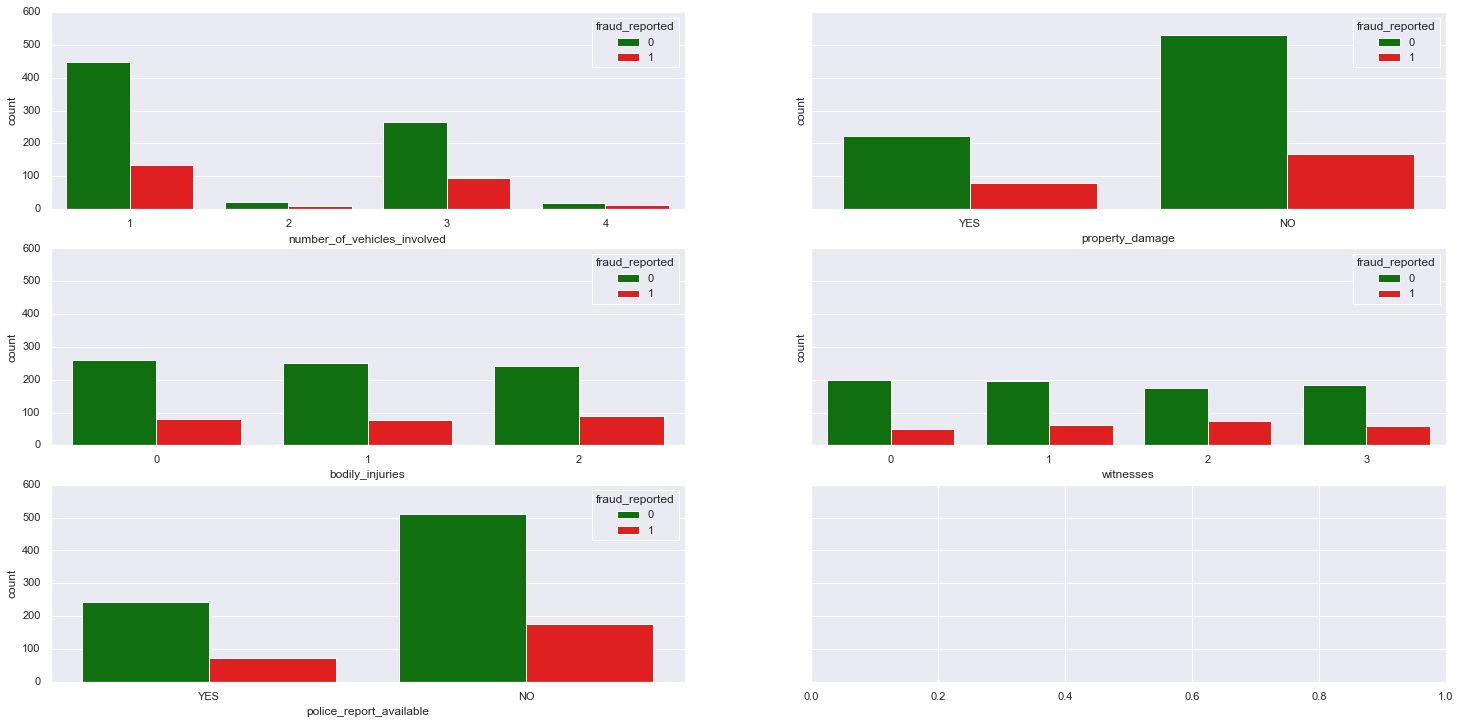

In [58]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize=(25, 12), sharey=True)
sns.countplot(x="number_of_vehicles_involved", data=df, hue="fraud_reported", ax=axes[0,0], palette=['green','red'])
sns.countplot(x="property_damage", data=df, hue="fraud_reported", ax=axes[0,1], palette=['green','red'])
sns.countplot(x="bodily_injuries", data=df, hue="fraud_reported", ax=axes[1,0], palette=['green','red'])
sns.countplot(x="witnesses", data=df, hue="fraud_reported", ax=axes[1,1], palette=['green','red'])
sns.countplot(x="police_report_available", data=df, hue="fraud_reported", ax=axes[2,0], palette=['green','red'])


<AxesSubplot:xlabel='incident_month', ylabel='count'>

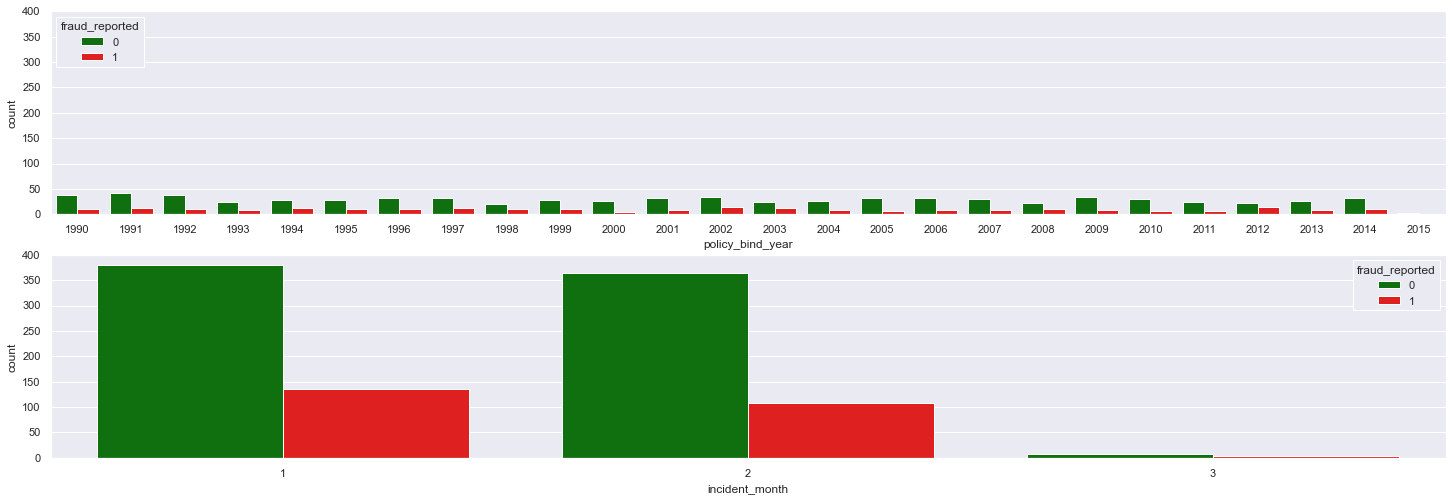

In [59]:
# Plotting the features against dependent features

sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(25, 8), sharey=True)
sns.countplot(x="policy_bind_year", data=df, hue="fraud_reported", ax=axes[0], palette=['green','red'])
sns.countplot(x="incident_month", data=df, hue="fraud_reported", ax=axes[1], palette=['green','red'])

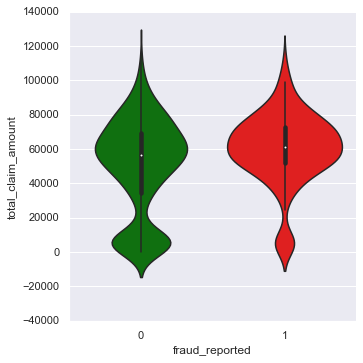

In [60]:
sns.catplot(data=df, x="fraud_reported", y="total_claim_amount", kind='violin', palette=['green','red'])

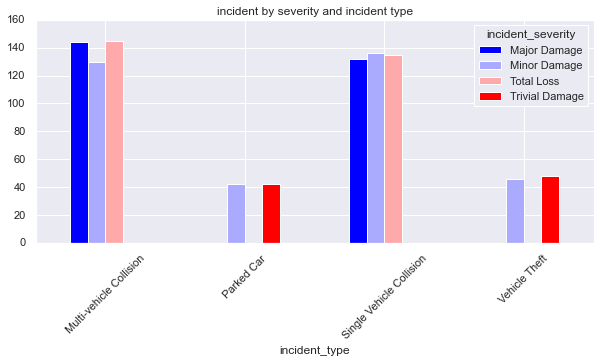

In [61]:
#more severe accidents seem to only be present with collision 

incident = pd.crosstab(df['incident_type'], df['incident_severity'])
incident.plot(kind='bar', colormap='bwr',figsize=(10,4))
plt.xticks(rotation=45)
plt.title("incident by severity and incident type");

Text(0.5, 1.0, 'incident by severity and collision type')

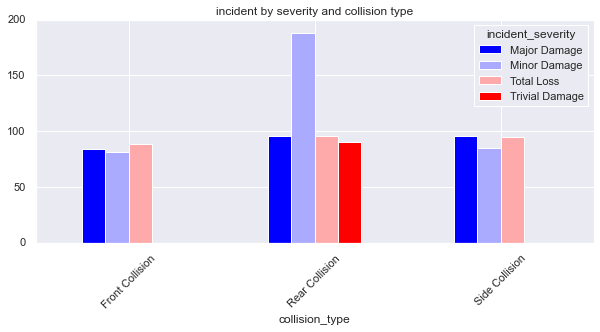

In [62]:
incident = pd.crosstab(df['collision_type'], df['incident_severity'])
incident.plot(kind='bar', colormap='bwr', figsize=(10,4))
plt.xticks(rotation=45)
plt.title("incident by severity and collision type")

In [63]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year,incident_month
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,2004,1,2014,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,2007,1,2006,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,2007,0,2000,2
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,2014,1,1990,1
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,2009,0,2014,2


In [64]:
import scipy.stats as stats

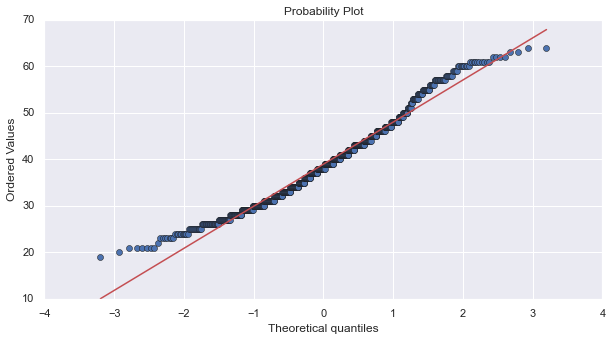

In [65]:
stats.probplot((df["age"]), dist="norm", plot=plt)
plt.show()

In [66]:
# creating bins for umbrella_limit

quantile_list = [0, .25, .5, .75, 1.]
quantiles = df["umbrella_limit"].quantile(quantile_list)
quantiles


0.00           0.0
0.25           0.0
0.50           0.0
0.75           0.0
1.00    10000000.0
Name: umbrella_limit, dtype: float64

In [67]:
df["umbrella_limit"].describe()

count    1.000000e+03
mean     1.103000e+06
std      2.296446e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: umbrella_limit, dtype: float64

In [68]:
df[df["umbrella_limit"] > 0].shape

(202, 37)

In [69]:
# 0 means no umbrella_limit and 1 means there is umbrella_limit

df["umbrella_limit"] = np.where(df["umbrella_limit"] > 0, 1, 0)

In [70]:
# Applying MinMaxScaler on continuous features

scaler = MinMaxScaler()

In [71]:
claims_data_unscaled = df.copy()

In [72]:
df["months_as_customer"] = scaler.fit_transform(df[["months_as_customer"]])
df["age"] = scaler.fit_transform(df[["age"]])
df["policy_annual_premium"] = scaler.fit_transform(df[["policy_annual_premium"]])

In [73]:
df["injury_claim"] = scaler.fit_transform(df[["injury_claim"]])
df["property_claim"] = scaler.fit_transform(df[["property_claim"]])
df["vehicle_claim"] = scaler.fit_transform(df[["vehicle_claim"]])

In [74]:
df["policy_bind_year"] = scaler.fit_transform(df[["policy_bind_year"]])

In [75]:
df["auto_year"] = scaler.fit_transform(df[["auto_year"]])

In [76]:
df["capital-gains"] = scaler.fit_transform(df[["capital-gains"]])
df["capital-loss"] = scaler.fit_transform(df[["capital-loss"]])

In [77]:
dict_policy_deductable = {1000:1, 2000:2, 500:0}
df["policy_deductable"] = df["policy_deductable"].map(dict_policy_deductable)
claims_data_unscaled["policy_deductable"] = claims_data_unscaled["policy_deductable"].map(dict_policy_deductable)

In [78]:
dict_insured_sex = {"MALE":0, "FEMALE":1}
df["insured_sex"] = df["insured_sex"].map(dict_insured_sex)
claims_data_unscaled["insured_sex"] = claims_data_unscaled["insured_sex"].map(dict_insured_sex)

In [79]:
dict_incident_severity = {"Trivial Damage":0, "Minor Damage":1, "Major Damage":2, "Total Loss":3}
df["incident_severity"] = df["incident_severity"].map(dict_incident_severity)
claims_data_unscaled["incident_severity"] = claims_data_unscaled["incident_severity"].map(dict_incident_severity)

In [80]:
le1 = LabelEncoder()
policy_state = le1.fit_transform(df["policy_state"])

ohe1 = OneHotEncoder()
policy_state_ohe = ohe1.fit_transform(policy_state.reshape(-1,1))
policy_state_ohe = pd.DataFrame(policy_state_ohe.toarray(), columns = ["policy_state_" + col for col in le1.classes_])

le2 = LabelEncoder()
policy_csl = le2.fit_transform(df["policy_csl"])

ohe2 = OneHotEncoder()
policy_csl_ohe = ohe2.fit_transform(policy_csl.reshape(-1,1))
policy_csl_ohe = pd.DataFrame(policy_csl_ohe.toarray(), columns = ["policy_csl_" + col for col in le2.classes_])

le3 = LabelEncoder()
insured_education_level = le3.fit_transform(df["insured_education_level"])

ohe3 = OneHotEncoder()
insured_education_level_ohe = ohe3.fit_transform(insured_education_level.reshape(-1,1))
insured_education_level_ohe = pd.DataFrame(insured_education_level_ohe.toarray(), columns = ["insured_education_level_" + col for col in le3.classes_])

le4 = LabelEncoder()
insured_occupation = le4.fit_transform(df["insured_occupation"])

ohe4 = OneHotEncoder()
insured_occupation_ohe = ohe4.fit_transform(insured_occupation.reshape(-1,1))
insured_occupation_ohe = pd.DataFrame(insured_occupation_ohe.toarray(), columns = ["insured_occupation_" + col for col in le4.classes_])

le5 = LabelEncoder()
insured_hobbies = le5.fit_transform(df["insured_hobbies"])

ohe5 = OneHotEncoder()
insured_hobbies_ohe = ohe5.fit_transform(insured_hobbies.reshape(-1,1))
insured_hobbies_ohe = pd.DataFrame(insured_hobbies_ohe.toarray(), columns = ["insured_hobbies_" + col for col in le5.classes_])

le6 = LabelEncoder()
insured_relationship = le6.fit_transform(df["insured_relationship"])

ohe6 = OneHotEncoder()
insured_relationship_ohe = ohe6.fit_transform(insured_relationship.reshape(-1,1))
insured_relationship_ohe = pd.DataFrame(insured_relationship_ohe.toarray(), columns = ["insured_relationship_" + col for col in le6.classes_])

le7 = LabelEncoder()
incident_type = le7.fit_transform(df["incident_type"])

ohe7 = OneHotEncoder()
incident_type_ohe = ohe7.fit_transform(incident_type.reshape(-1,1))
incident_type_ohe = pd.DataFrame(incident_type_ohe.toarray(), columns = ["incident_type_" + col for col in le7.classes_])

le8 = LabelEncoder()
collision_type = le8.fit_transform(df["collision_type"])

ohe8 = OneHotEncoder()
collision_type_ohe = ohe8.fit_transform(collision_type.reshape(-1,1))
collision_type_ohe = pd.DataFrame(collision_type_ohe.toarray(), columns = ["collision_type_" + col for col in le8.classes_])

le9 = LabelEncoder()
authorities_contacted = le9.fit_transform(df["authorities_contacted"])

ohe9 = OneHotEncoder()
authorities_contacted_ohe = ohe9.fit_transform(authorities_contacted.reshape(-1,1))
authorities_contacted_ohe = pd.DataFrame(authorities_contacted_ohe.toarray(), columns = ["authorities_contacted_" + col for col in le9.classes_])

le10 = LabelEncoder()
incident_state = le10.fit_transform(df["incident_state"])

ohe10 = OneHotEncoder()
incident_state_ohe = ohe10.fit_transform(incident_state.reshape(-1,1))
incident_state_ohe = pd.DataFrame(incident_state_ohe.toarray(), columns = ["incident_state_" + col for col in le10.classes_])

le11 = LabelEncoder()
property_damage = le11.fit_transform(df["property_damage"])

ohe11 = OneHotEncoder()
property_damage_ohe = ohe11.fit_transform(property_damage.reshape(-1,1))
property_damage_ohe = pd.DataFrame(property_damage_ohe.toarray(), columns = ["property_damage_" + col for col in le11.classes_])

le12 = LabelEncoder()
police_report_available = le12.fit_transform(df["police_report_available"])

ohe12 = OneHotEncoder()
police_report_available_ohe = ohe12.fit_transform(police_report_available.reshape(-1,1))
police_report_available_ohe = pd.DataFrame(police_report_available_ohe.toarray(), columns = ["police_report_available_" + col for col in le12.classes_])




In [81]:
# Features to drop after data preprocessing

features_to_drop = [ "policy_bind_date", "insured_zip", "incident_date", "incident_city", "total_claim_amount", "incident_month"]
df = df.drop(labels=features_to_drop, axis=1)
claims_data_unscaled = claims_data_unscaled.drop(labels=features_to_drop, axis=1)

In [82]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_bind_year
0,0.684760,0.644444,OH,250/500,1,0.603112,0,0,MD,craft-repair,sleeping,husband,0.530348,1.000000,Single Vehicle Collision,Side Collision,2,Police,SC,5,1,YES,1,2,YES,0.303497,0.550063,0.654296,0.45,1,0.96
1,0.475992,0.511111,IN,250/500,2,0.473214,1,0,MD,machine-op-inspct,reading,other-relative,0.000000,1.000000,Vehicle Theft,Rear Collision,1,Police,VA,8,1,NO,0,0,NO,0.036364,0.032953,0.043276,0.60,1,0.64
2,0.279749,0.222222,OH,100/300,2,0.606972,1,1,PhD,sales,board-games,own-child,0.349254,1.000000,Multi-vehicle Collision,Rear Collision,1,Police,NY,7,3,NO,2,3,NO,0.358974,0.162653,0.289722,0.60,0,0.40
3,0.534447,0.488889,IL,250/500,2,0.608582,1,1,PhD,armed-forces,board-games,unmarried,0.486567,0.438344,Single Vehicle Collision,Front Collision,2,Police,OH,5,1,NO,1,2,NO,0.295571,0.267850,0.637187,0.95,1,0.00
4,0.475992,0.555556,IL,500/1000,1,0.712760,1,0,Associate,sales,board-games,unmarried,0.656716,0.585959,Vehicle Theft,Rear Collision,1,None,NY,20,1,NO,0,1,NO,0.060606,0.027461,0.056359,0.70,0,0.96


In [83]:
# Concatenating the features and preparing data for tree-based alogirthms

y = df[["fraud_reported"]]
X_tree =  pd.concat([claims_data_unscaled[["months_as_customer", "age"]], policy_state_ohe, policy_csl_ohe, claims_data_unscaled[["policy_deductable", "policy_annual_premium", "umbrella_limit", "insured_sex"]],
                     insured_education_level_ohe, insured_occupation_ohe, insured_hobbies_ohe, insured_relationship_ohe, claims_data_unscaled[["capital-gains","capital-loss"]], incident_type_ohe, 
                     collision_type_ohe, claims_data_unscaled[["incident_severity"]], authorities_contacted_ohe, incident_state_ohe, property_damage_ohe, police_report_available_ohe,
                     claims_data_unscaled[["incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", "witnesses", "injury_claim", "property_claim", "vehicle_claim", "auto_year", "policy_bind_year"]] 
                     ], axis = 1)


In [84]:
X_nt =  pd.concat([df[["months_as_customer", "age"]], policy_state_ohe, policy_csl_ohe, df[["policy_deductable", "policy_annual_premium", "umbrella_limit", "insured_sex"]],
                     insured_education_level_ohe, insured_occupation_ohe, insured_hobbies_ohe, insured_relationship_ohe, df[["capital-gains","capital-loss"]], incident_type_ohe, 
                     collision_type_ohe, df[["incident_severity"]], authorities_contacted_ohe, incident_state_ohe, property_damage_ohe, police_report_available_ohe,
                     df[["incident_hour_of_the_day", "number_of_vehicles_involved", "bodily_injuries", "witnesses", "injury_claim", "property_claim", "vehicle_claim", "auto_year", "policy_bind_year"]] 
                     ], axis = 1)

In [85]:
X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(X_tree.values, y.values, test_size=0.2, stratify=y.values ,random_state=42)
print('X_train.shape: ', X_tree_train.shape, '\tX_test.shape: ', X_tree_test.shape, '\nY_train.shape: ', y_tree_train.shape, '\tY_test.shape: ', y_tree_test.shape)

X_train.shape:  (800, 94) 	X_test.shape:  (200, 94) 
Y_train.shape:  (800, 1) 	Y_test.shape:  (200, 1)


In [86]:
X_nt_train, X_nt_test, y_nt_train, y_nt_test = train_test_split(X_nt.values, y.values, test_size=0.2, stratify=y.values ,random_state=42)
print('X_train.shape: ', X_tree_train.shape, '\tX_test.shape: ', X_tree_test.shape, '\nY_train.shape: ', y_tree_train.shape, '\tY_test.shape: ', y_tree_test.shape)

X_train.shape:  (800, 94) 	X_test.shape:  (200, 94) 
Y_train.shape:  (800, 1) 	Y_test.shape:  (200, 1)


In [87]:
#SMOTE data for train set

oversample = SMOTE()
X_tree_train_smote, y_tree_train_smote = oversample.fit_resample(X_tree_train, y_tree_train)
X_nt_train_smote, y_nt_train_smote = oversample.fit_resample(X_nt_train, y_nt_train)

Text(0.5, 1.0, 'Class - Non-Tree - SMOTE')

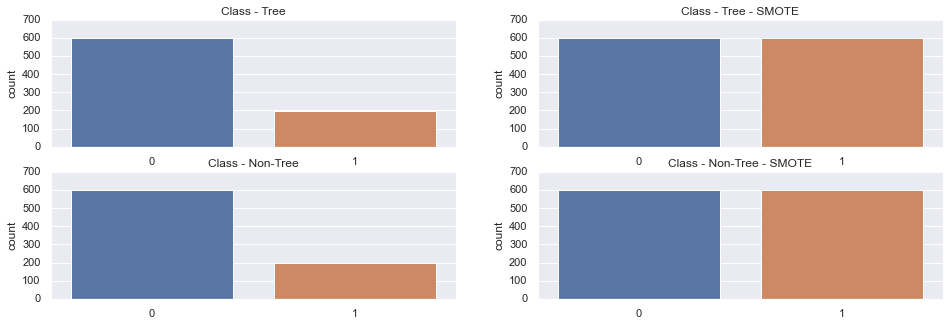

In [88]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(16, 5))
fig, ax1 = plot_objects

sns.countplot(x=y_tree_train.reshape(1,-1)[0], ax=ax1[0,0])
ax1[0,0].set_title("Class - Tree")

sns.countplot(x=y_tree_train_smote, ax=ax1[0,1])
ax1[0,1].set_title("Class - Tree - SMOTE")

sns.countplot(x=y_nt_train.reshape(1,-1)[0], ax=ax1[1,0])
ax1[1,0].set_title("Class - Non-Tree")

sns.countplot(x=y_nt_train_smote, ax=ax1[1,1])
ax1[1,1].set_title("Class - Non-Tree - SMOTE")

In [89]:
oversample = ADASYN()
X_tree_train_adasyn, y_tree_train_adasyn = oversample.fit_resample(X_tree_train, y_tree_train)
X_nt_train_adasyn, y_nt_train_adasyn = oversample.fit_resample(X_nt_train, y_nt_train)

Text(0.5, 1.0, 'Class - Non-Tree - SMOTE')

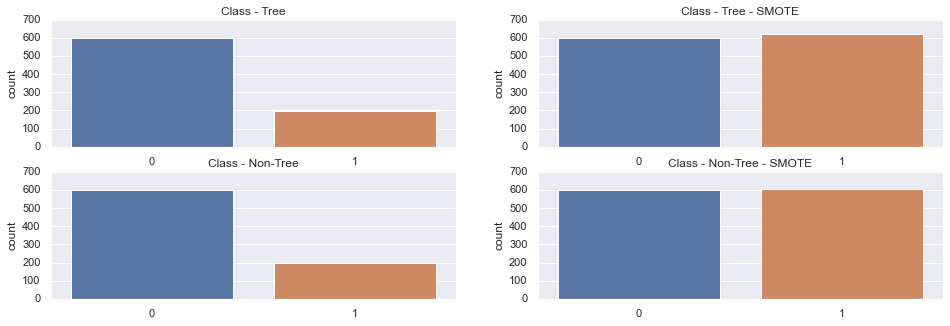

In [96]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(16, 5))
fig, ax1 = plot_objects

sns.countplot(x=y_tree_train.reshape(1,-1)[0], ax=ax1[0,0])
ax1[0,0].set_title("Class - Tree")

sns.countplot(x=y_tree_train_adasyn, ax=ax1[0,1])
ax1[0,1].set_title("Class - Tree - SMOTE")

sns.countplot(x=y_nt_train.reshape(1,-1)[0], ax=ax1[1,0])
ax1[1,0].set_title("Class - Non-Tree")

sns.countplot(x=y_nt_train_adasyn, ax=ax1[1,1])
ax1[1,1].set_title("Class - Non-Tree - SMOTE")

In [90]:
models = []
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("RFC", RandomForestClassifier()))
models.append(("ABC", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, )
    cv_results = cross_val_score(model, X_tree_train, y_tree_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

BNB: 0.463134 (0.056524)
GNB: 0.265195 (0.031586)
DTC: 0.601320 (0.074055)
RFC: 0.193494 (0.022183)
ABC: 0.554049 (0.018853)
GBT: 0.644700 (0.016158)


In [91]:
models = []
models.append(("LRE", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("LSC", LinearSVC()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3)
    cv_results = cross_val_score(model, X_nt_train, y_nt_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRE: 0.400826 (0.020745)
KNN: 0.213501 (0.112926)
SVM: 0.000000 (0.000000)
LSC: 0.431676 (0.006801)


In [92]:
models = []
models.append(("LRE", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("LSC", LinearSVC()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3)
    cv_results = cross_val_score(model, X_nt_train, y_nt_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRE: 0.400826 (0.020745)
KNN: 0.213501 (0.112926)
SVM: 0.000000 (0.000000)
LSC: 0.441905 (0.011742)


In [93]:
# Initializaing various classification algorithms. We are using Stratified Kfold with f1 as scoring parameter.

models = []
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("RFC", RandomForestClassifier()))
models.append(("ABC", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))


#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3)
    cv_results = cross_val_score(model, X_tree_train_smote, y_tree_train_smote, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

BNB: 0.673931 (0.360962)
GNB: 0.688039 (0.009026)
DTC: 0.806215 (0.157266)
RFC: 0.685212 (0.392430)
ABC: 0.638425 (0.410837)
GBT: 0.657916 (0.385550)


In [94]:
# Initializaing various classification algorithms

models = []
models.append(("LRE", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVM", SVC()))
models.append(("LSC", LinearSVC()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3)
    cv_results = cross_val_score(model, X_nt_train_smote, y_nt_train_smote, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LRE: 0.740537 (0.016094)
KNN: 0.726758 (0.006932)
SVM: 0.687103 (0.030301)
LSC: 0.736999 (0.030203)


In [95]:
dt = DecisionTreeClassifier()

dt_values = {'criterion' : ['gini', 'entropy'],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'min_samples_split': [2, 5, 7, 9, 11],
             'max_features': ['auto', 'sqrt'],
             'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 10}, None]
              }

In [98]:
kfold = StratifiedKFold(n_splits=5)
dt_clf = GridSearchCV(dt, dt_values, cv=kfold, n_jobs = -1)
dt_clf.fit(X_tree_train_adasyn, y_tree_train_adasyn)

print(dt_clf.best_params_)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2}


In [99]:
def model_report(model_name, model, X_train, y_train, X_test, y_test):

    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')

    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]

        for th in th_list[i]:
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print(model_name, 'accuracy score is')
    print('Training: {:.2f}%'.format(100*model.score(X_train, y_train)))  # score uses accuracy
    print('Test set: {:.2f}%'.format(100*model.score(X_test, y_test)))   # should use cross validation

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('\nDefault threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('\nAdjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    global model_f1, model_auc, model_ll, model_roc_auc
    model_f1 = f1_score(y_test, y_pred)

    y_pred = model.predict_proba(X_test)
    model_ll = log_loss(y_test, y_pred)
    print(model_name, 'Log-loss: {:.4f}'.format(model_ll))
    y_pred = model.predict(X_test)
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print(model_name, 'roc_auc_score: {:.4f}'.format(model_roc_auc)) 
    y_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    model_auc = auc(fpr, tpr)
    print(model_name, 'AUC: {:.4f}'.format(model_auc))

    # plot the ROC curve
    plt.figure(figsize = [6,6])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % model_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    # plt.savefig('roc_auc_score')
    plt.show()
  
    return

# initialise lists to collect the results to plot later
model_list = []
f1_list = []
auc_list = []
ll_list = []
roc_auc_list = []
time_list = []


"""""" Decision Tree Classifier """"""

Search for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data

Looping decimal place 1
0.000->0.3735,  0.100->0.3580,  0.200->0.3448,  0.300->0.3721,  0.400->0.4000,  0.500->0.4074,  0.600->0.4348,  0.700->0.4146,  0.800->0.2778,  0.900->0.2121,  1.000->0.2187,  
Looping decimal place 2
0.500->0.4074,  0.510->0.4167,  0.520->0.4167,  0.530->0.4167,  0.540->0.4167,  0.550->0.4167,  0.560->0.4211,  0.570->0.4211,  0.580->0.4348,  0.590->0.4348,  0.600->0.4348,  0.610->0.4048,  0.620->0.4048,  0.630->0.4048,  0.640->0.4048,  0.650->0.4048,  0.660->0.4048,  0.670->0.4146,  0.680->0.4146,  0.690->0.4146,  0.700->0.4146,  
Looping decimal place 3
0.570->0.4211,  0.571->0.4211,  0.572->0.4348,  0.573->0.4348,  0.574->0.4348,  0.575->0.4348,  0.576->0.4348,  0.577->0.4348,  0.578->0.4348,  0.579->0.4348,  0.580->0.4348,  0.581->0.4348,  0.582->0.4348,  0.583->0.4348,  0.584->0.4348,  0.585->0.4348,  0.586->0.4348,  0.587->0.43

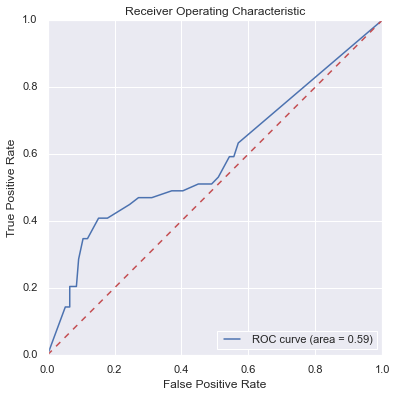

In [100]:
print('\n"""""" Decision Tree Classifier """"""')

dt_final = DecisionTreeClassifier(class_weight = {0: 1, 1: 1}, criterion = 'entropy', max_depth = 100, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 11)

model_report('DTClassifier', dt_final, X_tree_train_adasyn, y_tree_train_adasyn, X_tree_test, y_tree_test)

model_list.append('DTClassfier')
f1_list.append(model_f1)
auc_list.append(model_auc)
ll_list.append(model_ll)
roc_auc_list.append(model_roc_auc)

In [101]:
import joblib
joblib.dump(GCV.best_estimator_,"insurancefinalDTC.pkl")

NameError: name 'GCV' is not defined